In [27]:
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [41]:
df = pd.read_parquet('Orbit Response (2025-08-14 at 10-37-11).parquet', engine = 'pyarrow')
df

Measurement 1
BPM             Corrector          Step (mrad)               
BS-DI-EBPM-02:X BS-PC-HSTR-01:SETI -0.5             -0.000448
                                   0.0               0.001710
                                   0.5               0.003868
                BS-PC-HSTR-02:SETI -0.5             -0.002456
                                   0.0              -0.001421
...                                                       ...
BS-DI-EBPM-07:Y BS-PC-VSTR-06:SETI 0.0               0.003153
                                   0.5               0.008950
                BS-PC-VSTR-07:SETI -0.5             -0.002252
                                   0.0               0.000328
                                   0.5               0.002907

[504 rows x 1 columns]

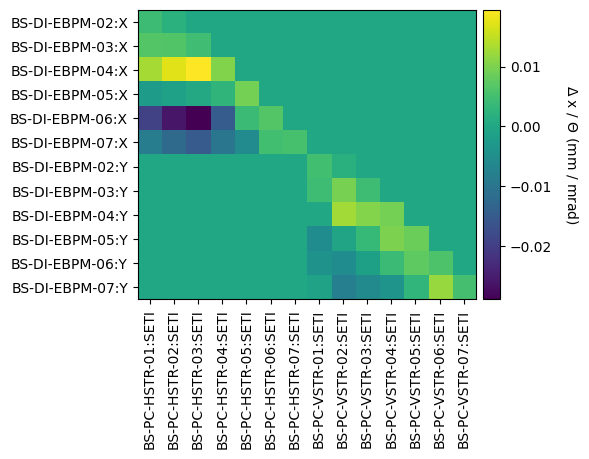

In [40]:
import matplotlib.pyplot as plt

data = df.to_numpy()
shape = [len(level) for level in df.index.levels]
labels = [df.index.get_level_values(_).unique().tolist() for _ in range(len(shape) - 1)] # preserves labelling order of df
data = data.reshape(*shape, df.shape[1])

numCorrectors = 14
numBPMs = 12
kicks = np.linspace(-.5, .5, 3)

postProcessedData = np.zeros((numBPMs, numCorrectors))

dataAveragedOverRepeats = data.mean(axis = 3)
for col in range(numCorrectors):
    for row in range(numBPMs):
        y = dataAveragedOverRepeats[row, col, :]
        m, C = np.polyfit(kicks, y, deg = 1, cov = True)
        postProcessedData[row, col] = m[0]

fig, ax = plt.subplots(figsize = (6, 6))
im = ax.imshow(postProcessedData)
ax.set_yticks(list(range(numBPMs)))
ax.set_yticklabels(labels[0])
ax.set_xticks(list(range(numCorrectors)))
ax.set_xticklabels(labels[1], rotation = 90)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.075)
cb = fig.colorbar(im, cax = cax, ax = ax)
cb.set_label(r'$\Delta~\mathrm{x}~/~\Theta$ (mm / mrad)', rotation = 270, labelpad = 20)
fig.tight_layout()
fig.savefig('Model default ORM (2025-08-14 at 10-33-46)', dpi = 300, bbox_inches = 'tight')

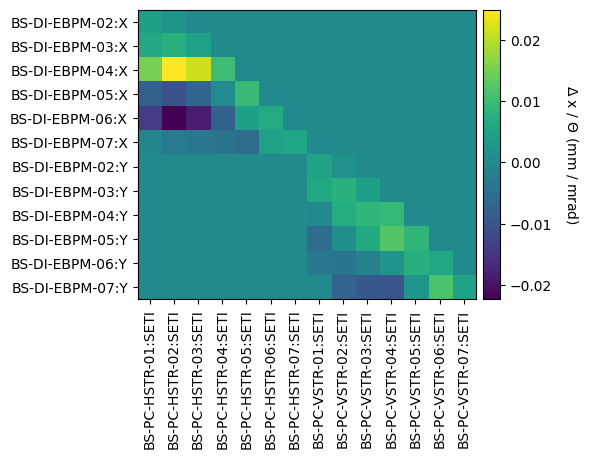

In [45]:
import matplotlib.pyplot as plt

data = df.to_numpy()
shape = [len(level) for level in df.index.levels]
labels = [df.index.get_level_values(_).unique().tolist() for _ in range(len(shape) - 1)] # preserves labelling order of df
data = data.reshape(*shape, df.shape[1])

numCorrectors = 14
numBPMs = 12
kicks = np.linspace(-.5, .5, 3)

postProcessedData = np.zeros((numBPMs, numCorrectors))

dataAveragedOverRepeats = data.mean(axis = 3)
for col in range(numCorrectors):
    for row in range(numBPMs):
        y = dataAveragedOverRepeats[row, col, :]
        m, C = np.polyfit(kicks, y, deg = 1, cov = True)
        postProcessedData[row, col] = m[0]

fig, ax = plt.subplots(figsize = (6, 6))
im = ax.imshow(postProcessedData)
ax.set_yticks(list(range(numBPMs)))
ax.set_yticklabels(labels[0])
ax.set_xticks(list(range(numCorrectors)))
ax.set_xticklabels(labels[1], rotation = 90)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "5%", pad = 0.075)
cb = fig.colorbar(im, cax = cax, ax = ax)
cb.set_label(r'$\Delta~\mathrm{x}~/~\Theta$ (mm / mrad)', rotation = 270, labelpad = 20)
fig.tight_layout()
fig.savefig('Model with online setpoints (2025-08-14 at 10-37-11)', dpi = 300, bbox_inches = 'tight')